# Speaker diarization

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sensein/senselab/blob/main/tutorials/audio/speaker_diarization.ipynb)

This tutorial demonstrates how to use the `diarize_audios` function to perform speaker diarization on some audio files, which means to segment the audio into multiple speakers.

In [1]:
%pip install 'senselab[audio]'

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary modules
from senselab.audio.data_structures import Audio
from senselab.audio.tasks.plotting.plotting import play_audio
from senselab.audio.tasks.preprocessing import resample_audios
from senselab.audio.tasks.speaker_diarization import diarize_audios
from senselab.utils.data_structures import DeviceType, HFModel, PyannoteAudioModel
from senselab.utils.tasks.plotting import plot_segment
import os

# for Jupyter Notebook
%matplotlib inline 

/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/speechbrain/utils/torch_audio_backend.py:57: UserWarning: torchaudio._backend.list_audio_backends has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. The decoding and encoding capabilities of PyTorch for both audio and video are being consolidated into TorchCodec. Please see https://github.com/pytorch/audio/issues/3902 for more information. It will be removed from the 2.9 release. 
  available_backends = torchaudio.list_audio_backends()
/Users/fabiocat/Library/Caches/pypoetry/virtualenvs/senselab-KP8v1V64-py3.12/lib/python3.12/site-packages/torchaudio/pipelines/_squim_pipeline.py:53: UserWarning: torchaudio.utils.download.download_asset has been deprecated. This deprecation is part of a large refactoring effort to transition TorchAudio into a maintenance phase. Please see https://github.com/pytorch/audio/iss

In [3]:
# Initialize a PyannoteAudioModel for speaker diarization, providing the model's path or URI.
model = PyannoteAudioModel(path_or_uri="pyannote/speaker-diarization-3.1")

# Specify the device type to be used for processing (CPU in this case).
device = DeviceType.CPU

In [4]:
# Load an audio file from the specified file path into an Audio object.
!mkdir -p tutorial_audio_files
!wget -O tutorial_audio_files/audio_48khz_mono_16bits.wav https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav

audio = Audio(filepath=os.path.abspath("tutorial_audio_files/audio_48khz_mono_16bits.wav"))

# Resample the audio to 16kHz, as this is the expected input format for the model.
# The resample_audios function returns a list, so we take the first (and only) element.
audio = resample_audios([audio], 16000)[0]

# Play the resampled audio to verify the preprocessing step was successful.
play_audio(audio)

--2025-09-15 19:18:34--  https://github.com/sensein/senselab/raw/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav [following]
--2025-09-15 19:18:41--  https://raw.githubusercontent.com/sensein/senselab/main/src/tests/data_for_testing/audio_48khz_mono_16bits.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 472488 (461K) [audio/wav]
Saving to: ‘tutorial_audio_files/audio_48khz_mono_16bits.wav’

tutorial_audio_file 100%[===================>] 461.41K  --.-KB/s   

In [5]:
# Perform speaker diarization on the audio using the specified model and device.
# The function returns a list of results, where each element corresponds to an audio segment.
results = diarize_audios(audios=[audio], model=model, device=device)

# Print the results of speaker diarization to the console.
print(results)

2025-09-15 19:18:44,095 - senselab - INFO - Time taken to initialize the pyannote model: 1.62 seconds
2025-09-15 19:18:44,759 - senselab - INFO - Time taken to perform diarization: 0.66 seconds


[[SPEAKER_00:  [0.03 - 3.05], SPEAKER_01:  [3.32 - 4.89]]]


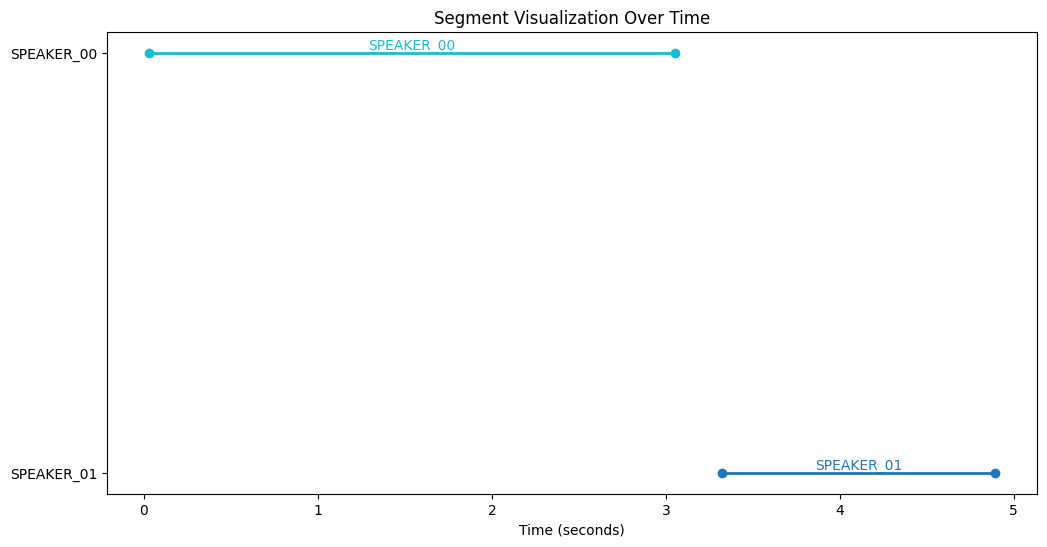

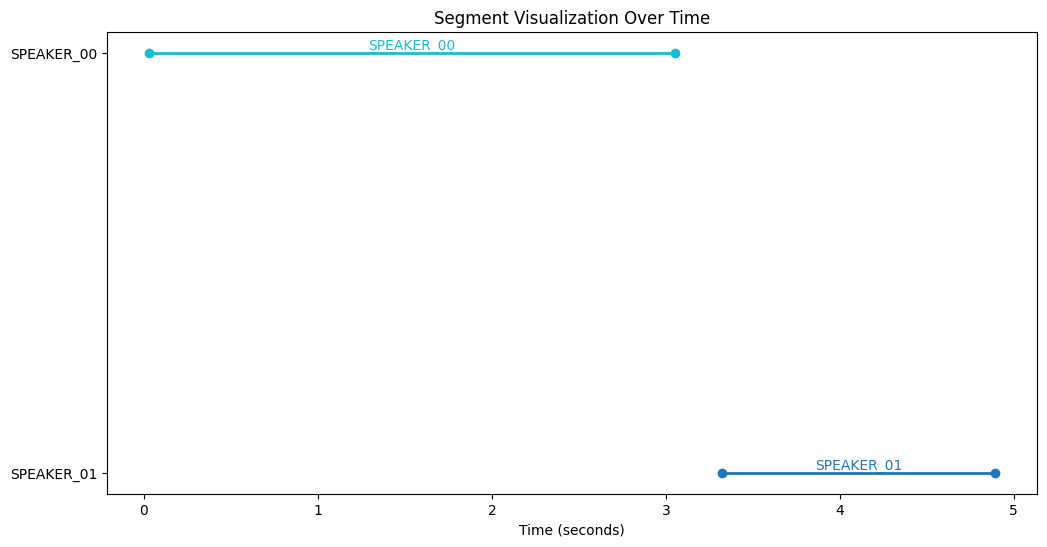

In [6]:
# Plot the detected speakers for visualization.
plot_segment(results[0])

**Ehm wait**. In the audio, we can hear four speakers, but the speaker diarization results indicate only two speakers. Why is this happening?

Unfortunately, the model is not perfect and can make mistakes. We can try adjusting the parameters by setting `num_speakers=4`, `min_speakers=4`, and `max_speakers=4` to force the model to recognize four speakers. However, this approach doesn't always work as expected.

And let's say we want to try with a cool NVIDIA nemo model, we can do the following:

In [7]:
model2 = HFModel(path_or_uri="nvidia/diar_sortformer_4spk-v1")
results = diarize_audios(audios=[audio], model=model2, device=device)
print(results)

[NeMo W 2025-09-15 19:18:46 nemo_logging:405] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: null
    sample_rate: 16000
    num_spks: 4
    session_len_sec: 90
    soft_label_thres: 0.5
    soft_targets: false
    labels: null
    batch_size: 4
    shuffle: true
    num_workers: 18
    validation_mode: false
    use_lhotse: false
    use_bucketing: false
    num_buckets: 10
    bucket_duration_bins:
    - 10
    - 20
    - 30
    - 40
    - 50
    - 60
    - 70
    - 80
    - 90
    pin_memory: true
    min_duration: 80
    max_duration: 90
    batch_duration: 400
    quadratic_duration: 1200
    bucket_buffer_size: 20000
    shuffle_buffer_size: 10000
    window_stride: 0.01
    subsampling_factor: 8
    
[NeMo W 2025-09-15 19:18:46 nemo_logging:405] If you intend to do validation, please call the ModelPT.setup_validation

[NeMo I 2025-09-15 19:18:46 nemo_logging:393] PADDING: 16
[NeMo I 2025-09-15 19:18:47 nemo_logging:393] Model SortformerEncLabelModel was successfully restored from /Users/fabiocat/.cache/huggingface/hub/models--nvidia--diar_sortformer_4spk-v1/snapshots/a036d2486ba4afec9ad9dc0689a775428e9b7755/diar_sortformer_4spk-v1.nemo.


2025-09-15 19:18:47,202 - senselab - INFO - Time taken to initialize the NVIDIA Sortformer model: 1.91 seconds


[NeMo I 2025-09-15 19:18:47 nemo_logging:393] No postprocessing YAML file has been provided. Default postprocessing configurations will be applied.


Diarizing: 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]
2025-09-15 19:18:47,752 - senselab - INFO - Time taken to perform diarization: 0.55 seconds


[[speaker_0:  [0.08 - 4.92]]]


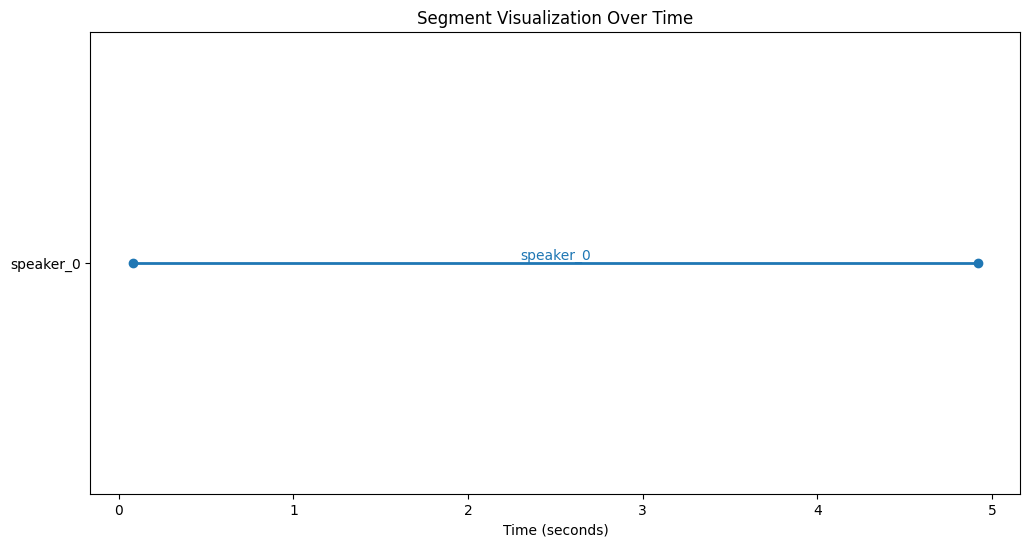

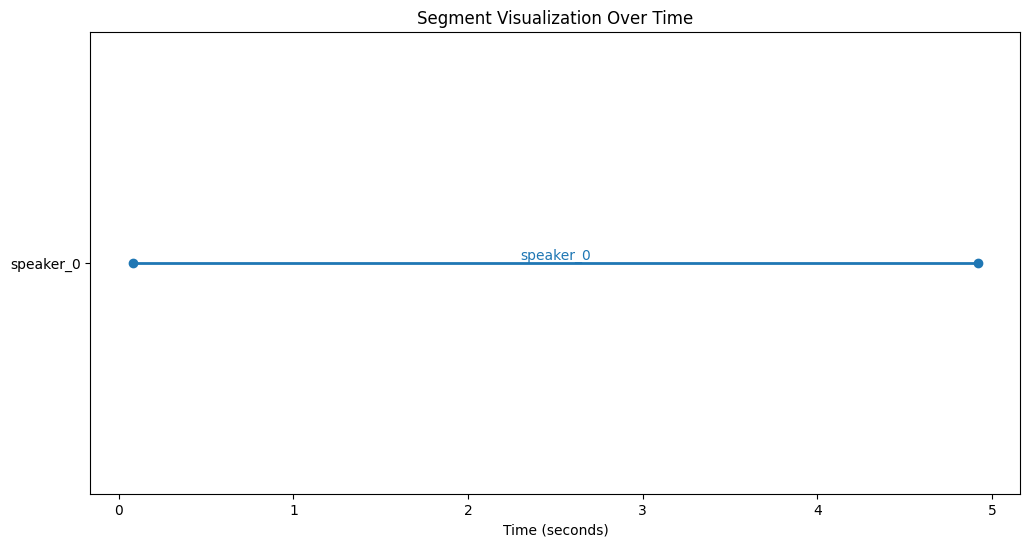

In [8]:
plot_segment(results[0])

It didn't work well either, we know. This is probably because the audio is very noisy, though...